<a href="https://colab.research.google.com/github/hursoo/FD_of_MAN/blob/main/jindan_1_count_char.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.개요
- 서울대 인문학연구원 발간 "인문논총"(2025년 5월) 게재 논문 관련
- 기본 입력 파일: JDH_Data_new.xlsx

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 폴더 경로 지정
file_path = '/content/drive/MyDrive/_JINDAN/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## 런타임 다시 시작 후엔 이 셀 건너뛸 것 !

# =================================================================
# 1단계: 나눔 폰트 설치 (이 셀을 실행한 후, 런타임을 다시 시작해야 합니다)
# =================================================================
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126319 files and direc

In [ ]:
# 필요한 라이브러리 가져오기

import sys
import os, re
import pandas as pd
import numpy as np
import math # math: 수학 계산 함수 모음
import random
import warnings

import matplotlib.pyplot as plt # matplotlib.pyplot: 그래프 생성용, plt로 사용
import matplotlib as mpl # matplotlib: 그래프 스타일 및 설정 변경용, mpl로 사용
import matplotlib.font_manager as fm # matplotlib.font_manager: 그래프 글꼴 관리용, fm으로 사용
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕으로 설정 (Colab 기본 포함) ###
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호가 정상 표시되도록 설정

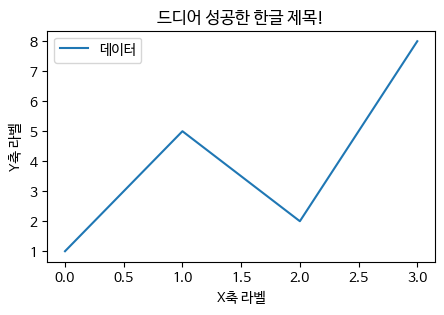

In [ ]:
# --- 이제 그래프를 그려도 경고가 뜨지 않습니다. ---

# 예시 그래프
# (여기에 원래 그리려던 그래프 코드를 넣으시면 됩니다)
plt.figure(figsize=(5, 3))
plt.title('드디어 성공한 한글 제목!')
plt.xlabel('X축 라벨')
plt.ylabel('Y축 라벨')
plt.plot([1, 5, 2, 8], label='데이터')
plt.legend()
plt.show()

# 2.진단학보 발간 정보
- 발행 연월 달력에서 1~14호 표시하기

In [ ]:
!pip install openpyxl

In [ ]:
# 새로 업로드된 Excel 파일 구조 검사를 위해 파일 로드
file_name = file_path + 'data/JDH_Data_new.xlsx'
jdh_data = pd.ExcelFile(file_name) # pandas로 Excel 파일 열기

# 새 파일 구조 이해를 위해 시트 이름 표시
jdh_data.sheet_names # jdh_data (Excel 파일) 내 모든 시트 이름 출력

['Term59', 'Ph59', 'Foot59', 'Pub77(59)', 'RowInfo']

In [ ]:
# 'RowInfo' 시트를 DataFrame으로 로드
rowinfo_data = jdh_data.parse('RowInfo') # jdh_data (앞서 열었던 Excel 파일)에서 'RowInfo' 시트를 읽어와서 rowinfo_data라는 표(DataFrame)로 저장

# 로드된 데이터의 처음 몇 줄 확인
rowinfo_data.head() # rowinfo_data 표의 맨 위 5줄을 화면에 바로 출력 (내용 미리보기)

,No,RawID,GisaId,Auth,AuthM,AuthO,Tran,TranM,Cat,Title,TitM,Pub,PubM,VolI,Publ,Date,SPage,EPage,ClsR,ClsUseR
0,1,CHDA_001_01,이병도(jdh193411a),李丙燾,이병도,NaN,NaN,NaN,논술,三韓問題의 新考察(一)-辰國及三韓考-,삼한문제의 신고찰(1)-진국 및 삼한고-,震檀學報,진단학보,1,震檀學會,19341100,1,25,R,UR
1,2,CHDA_001_02,이상백(jdh193411),李相佰,이상백,NaN,NaN,NaN,논술,庶孽 差待의 淵源에 對한 一問題,서얼 차대의 연원에 대한 일문제,震檀學報,진단학보,1,震檀學會,19341100,26,55,R,UR
2,3,CHDA_001_03,조윤제(jdh193411),趙潤濟,조윤제,NaN,NaN,NaN,논술,朝鮮詩歌의 胎生,조선시가의 태생,震檀學報,진단학보,1,震檀學會,19341100,56,85,R,UR
3,4,CHDA_001_04,김상기(jdh193411),金庠基,김상기,NaN,NaN,NaN,논술,古代의 貿易形態와 羅末의 海上發展에 就하야 (一)-淸海鎭大使張保皐를 主로 하야-,고대 무역형태와 나말의 해상발전에 취하야(1)-청해진대사장보고를 주로 하야-,震檀學報,진단학보,1,震檀學會,19341100,86,112,R,UR
4,5,CHDA_001_05,이병기(jdh193411),李秉岐,이병기,NaN,NaN,NaN,논술,時調의 發生과 歌曲과의 區分,시조의 발생과 가곡의 구분,震檀學報,진단학보,1,震檀學會,19341100,113,144,R,NaN


In [ ]:
# 달력의 연도와 월 범위 정의
years = list(range(1934, 1942))  # 사용할 연도 범위 (1934년부터 1941년까지)
months = list(range(1, 13))     # 사용할 월 범위 (1월부터 12월까지)

# 'Date' 컬럼에서 'YearMonth' 정보 추출 (YYYYMM 형식)
rowinfo_data['YearMonth'] = rowinfo_data['Date'].astype(str).str[:6] # 'Date'를 문자열로 바꿔 앞 6자리(YYYYMM)를 'YearMonth'로 저장

# 'YearMonth' 형식이 올바르지 않은 행 필터링 (6자리가 아닌 경우 제외)
rowinfo_data = rowinfo_data[rowinfo_data['YearMonth'].str.len() == 6] # 'YearMonth' 길이가 6인 데이터만 남김

# 'YearMonth'를 'YYYY-MM' 형식으로 변환
rowinfo_data['YearMonth'] = rowinfo_data['YearMonth'].apply(
    lambda x: f"{x[:4]}-{x[4:]}" # YYYYMM을 YYYY-MM 형태로 변경
)

# 발행 호수와 'YYYY-MM' 날짜를 매핑하는 딕셔너리 생성
corrected_publication_dates = {
    f"{int(row['VolI'])}호": row['YearMonth'] # 'VolI' 컬럼 값을 정수로 바꿔 "X호" 형식의 키로, 'YearMonth'를 값으로 저장
    for _, row in rowinfo_data.iterrows() # rowinfo_data의 각 행을 순회하며 작업
}

# 연도와 월을 기준으로 하는 빈 달력 DataFrame 생성 (초기값은 빈 문자열)
calendar_df = pd.DataFrame("", index=years, columns=months) # 정의된 연도를 행, 월을 열로 하는 표 생성, 모든 칸은 빈칸("")

# 달력 DataFrame에 발행 호수 정보 채우기
for issue, date_str in corrected_publication_dates.items(): # 딕셔너리의 각 항목 (호수, 날짜 문자열)에 대해 반복
    year, month = map(int, date_str.split("-")) # 'YYYY-MM' 형식의 날짜를 '-' 기준으로 나눠 각각 정수형 연도와 월로 변환
    if year in calendar_df.index and month in calendar_df.columns: # 해당 연도와 월이 달력 범위 내에 있는지 확인
        calendar_df.loc[year, month] = issue # 달력의 해당 연도, 월 위치에 호수 정보('issue')를 기록

# 완성된 달력 DataFrame 확인
calendar_df # 최종적으로 정리된 달력 형태의 표를 화면에 출력

,1,2,3,4,5,6,7,8,9,10,11,12
1934,,,,,,,,,,,1호,
1935,,,,2호,,,,,3호,,,
1936,,,,4호,,,5호,,,,6호,
1937,,,,,,,7호,,,,8호,
1938,,,,,,,9호,,,,,
1939,,,,10호,,,,,,,,11호
1940,,,,,,,,,12호,,,
1941,,,13호,,,14호,,,,,,


# 3.예비: 글자 수 파악

## 3.1.본문 글자 수
- 기본 입력 데이터: 문단 단위를 행으로 하는 본문 관련 정보 (기본 입력 파일 중 ph59 탭)
- 공백 제외 / 공백 이외에는 모두 1개 글자로 계산

### 3.1.1.파일 불러오기

In [ ]:
# 본문(main) 및 주석(anno) 데이터 불러오기 -> total(전체)
total = pd.read_excel(file_name, sheet_name = 'Ph59')
total

,No,PhrId,TermId,PhPage,Mok1,Mok2,MokHead,FpClass,StartEnd,Content,FootNo,Comment,CharSize
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109,NaN,NaN,NaN,NaN,Start,쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,"['원문주1▶[1]', '원문주2▶[2]', '원문주3▶[3]', '원문주4▶[4]...",NaN,NaN
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),쪽수▶P111-2,본문1: 一.人物畫,NaN,NaN,NaN,NaN,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,[],NaN,NaN
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),쪽수▶P112-2,본문1: 一.人物畫,본문1-1: (甲)眞殿의 發達,NaN,NaN,NaN,"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...",['원문주6▶[6]'],NaN,NaN
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),쪽수▶P113-2,본문1: 一.人物畫,본문1-1: (甲)眞殿의 發達,NaN,NaN,NaN,"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...",['원문주7▶[7]'],NaN,NaN
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),쪽수▶P114-2,본문1: 一.人物畫,본문1-1: (甲)眞殿의 發達,NaN,NaN,NaN,"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...",[],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),쪽수▶P156-3,본문11: 十七. 漢文春香傳,NaN,NaN,NaN,NaN,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,[],NaN,NaN
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),쪽수▶P157-2,본문11: 十七. 漢文春香傳,NaN,NaN,NaN,NaN,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,[],NaN,NaN
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),쪽수▶P157-3,본문12: 結言,NaN,NaN,NaN,NaN,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,[],NaN,NaN
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),쪽수▶P158-2,본문12: 結言,NaN,NaN,NaN,NaN,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,[],NaN,NaN


In [ ]:
# 필요한 열만 추출
total_br1 = total.iloc[:, [0,1,2,7,8,9]]
total_br1

,No,PhrId,TermId,FpClass,StartEnd,Content
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),NaN,Start,쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),NaN,NaN,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),NaN,NaN,"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),NaN,NaN,"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),NaN,NaN,"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),NaN,NaN,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),NaN,NaN,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),NaN,NaN,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),NaN,NaN,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


In [ ]:
# 주석 표시 열의 값 확인
print(total_br1['FpClass'].tolist()[:100])
total_br1[70:100]

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'FpAll', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'FpAll', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'FpAll', nan, nan, nan, nan, 'Fp-1', nan, nan, nan, nan, nan, nan, nan]


,No,PhrId,TermId,FpClass,StartEnd,Content
70,71,고유섭(jdh193611)P31,고유섭(jdh193611),NaN,End,End
71,72,고유섭(jdh193711)P57-1,고유섭(jdh193711),NaN,Start,新羅末 高麗初에 民衆들이 出家避役하는 傾向이 濃盛함에 政經上 不安을원문주1▶麗太祖가...
72,73,고유섭(jdh193711)P57-2,고유섭(jdh193711),NaN,NaN,此間에 있어 佛敎自體는 加持祈禱의 他力本願에 堕하여 一般 民衆에 迷信的으로 젖어들어...
73,74,고유섭(jdh193711)P58-2,고유섭(jdh193711),NaN,NaN,夫浮屠氏之法一也 或称禅或称教何也 佛心谓之禅佛说谓 教也者 得法之具也 沿而得之 則筌蹄〿...
74,75,고유섭(jdh193711)P59-2,고유섭(jdh193711),NaN,NaN,"이러한 生活感情, 이러한 思想傾向에서 産出되는藝術이란 古典的 明朗性을 가질 수는 到..."
75,76,고유섭(jdh193711)P59-3,고유섭(jdh193711),NaN,NaN,그러면 이러한 特色을 우리는 爲先에서 볼 수 있겠는가─朝鮮의 建築이란 元來가 階級的...
76,77,고유섭(jdh193711)P60-2,고유섭(jdh193711),NaN,NaN,『今王之所居堂 圓櫨方頂 飛鞏連甍 丹碧藻飾 望之潭▶P61々然 依崧山之脊 蹭道突兀 古木...
77,78,고유섭(jdh193711)P62-2,고유섭(jdh193711),NaN,NaN,그러나 이러한 樣式보다도 高麗에 가장 盛行되고 愛好된 茅亭園池의 經營이야말로 確實히...
78,79,고유섭(jdh193711)P62-3,고유섭(jdh193711),NaN,NaN,幽禽入水擘靑羅 微動方池擁蓋荷 欲識禪心元自淨 秋蓮濯濯出寒波(水多寺荷池)杜門無客到 煮茗...
79,80,고유섭(jdh193711)P63-2,고유섭(jdh193711),NaN,NaN,이러한 例는 一一히 頻擧할 必要도 없지만 齋亭園池의 經營에 얼마나 道佛的 影響이 深...


In [ ]:
# 주석이 아닌 행(즉, 본문 = main)만 추출
main = total_br1[total_br1['FpClass'].isnull()]
main

,No,PhrId,TermId,FpClass,StartEnd,Content
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),NaN,Start,쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),NaN,NaN,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),NaN,NaN,"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),NaN,NaN,"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),NaN,NaN,"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),NaN,NaN,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),NaN,NaN,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),NaN,NaN,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),NaN,NaN,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


In [ ]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3716 entries, 0 to 3801
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        3716 non-null   int64 
 1   PhrId     3716 non-null   object
 2   TermId    3716 non-null   object
 3   FpClass   0 non-null      object
 4   StartEnd  110 non-null    object
 5   Content   3716 non-null   object
dtypes: int64(1), object(5)
memory usage: 332.3+ KB


In [ ]:
main.describe()

,No
count,3716.000000
mean,1910.333423
std,1096.333550
min,1.000000
25%,960.750000
50%,1913.500000
75%,2866.250000
max,3802.000000


### 3.1.2.본문 정제
- 원문에 없는 표시 삭제

In [ ]:
def clean_text(text):
    # 1) "▶P" + 1~3자리 숫자 (+ 선택적으로 -1~3자리)
    text = re.sub(r'▶P\d{1,3}(?:-\d{1,3})?', ' ', text)

    # 2) "쪽수", "원문주(+숫자|-숫자)" 직후에 "▶"가 오는 패턴
    text = re.sub(r'(?:쪽수|원문주(?:\d{1,3}(?:-\d{1,3})?)?)▶', ' ', text)

    # 3) 대괄호 안의 숫자 [숫자]
    text = re.sub(r'\[\d+\]', ' ', text)

    # 4) "쪽수"가 남아 있는 경우가 있다.
    text = re.sub('쪽수', '', text)

    # 추가로, 여러 개의 공백이 생겼을 수 있으므로 필요하다면 정리
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# 함수 적용
main = main.copy()
main['Content_Cleaned'] = main['Content'].apply(clean_text)
main_cleaning = main[['No', 'PhrId', 'TermId', 'Content', 'Content_Cleaned']]
main_cleaning

,No,PhrId,TermId,Content,Content_Cleaned
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至 遺跡이 稀貴...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...","黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...","이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...","以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


### 3.1.3.글자 수 계산

#### 3.1.3.1.무관한 행 제외
- 'Content'에 "End"만 있는 경우 제외

In [ ]:
main_cleaned = main_cleaning[main_cleaning['Content_Cleaned'] != 'End'].copy()
main_cleaned

,No,PhrId,TermId,Content,Content_Cleaned
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至 遺跡이 稀貴...
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...","黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立..."
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...","이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던..."
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...","以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光..."
...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...


#### 3.1.3.2.옛한글 조합형을 1글자로 인식하기
- 이숭녕 글에 많음

In [ ]:
!pip install regex

In [ ]:
# 조합형을 1글자로 인식하고, 전체적으로 공백을 제거한 뒤 글자 수 세기

import regex
def count_visual_letters_excluding_whitespace(text: str) -> int:
    """
    문자열에서 공백(스페이스, 탭, 개행 등)을 제외한
    그래프 클러스터(시각적으로 보이는 글자) 수를 반환합니다.
    """
    # 1. 문자열에서 공백만 제거
    text_no_space = ''.join(ch for ch in text if not ch.isspace())

    # 2. 그래프 클러스터(\X) 단위로 매칭 : 조합식 한글을 1음절로 계산해 주는 코드 (이숭녕 글에 빈발)
    clusters = regex.findall(r'\X', text_no_space)

    # 3. 시각적으로 보이는 글자 수
    return len(clusters)

In [ ]:
# 글자 수 정보 담은 열 추가
main_cleaned_count = main_cleaned.copy()
main_cleaned_count['CharCount'] = main_cleaned_count['Content_Cleaned'].apply(count_visual_letters_excluding_whitespace)
main_cleaned_count

,No,PhrId,TermId,Content,Content_Cleaned,CharCount
0,1,고유섭(jdh193509)P109,고유섭(jdh193509),쪽수▶P109一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至...,一般으로 朝鮮文化 方面이 다 그러하지만 美術工藝品에 있어서도 文獻 乃至 遺跡이 稀貴...,1649
1,2,고유섭(jdh193509)P111-2,고유섭(jdh193509),元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,元來 繪畫의 始源이 人物畫에 있었음은 作畫衝動이 發揮되기 시작하는 兒童의 戱畫에 도...,439
2,3,고유섭(jdh193509)P112-2,고유섭(jdh193509),"黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...","黃胤錫 頤齋集에 髙麗 眞殿의 源始說이 있으니 하였으되 漢制自諸帝各廟在京師者外, 別立...",743
3,4,고유섭(jdh193509)P113-2,고유섭(jdh193509),"이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...","이밖에 陵廟에도 眞殿이 있었음은 世祖 昌陵의 眞殿이 그 一例요, 正陵 丁字閣에 있던...",922
4,5,고유섭(jdh193509)P114-2,고유섭(jdh193509),"以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...","以外에도 上述한 寺社眞殿 外에 麗史 兵制에 弘圓寺 九祖 堂, 興王寺, 大雲寺, 重光...",112
...,...,...,...,...,...,...
3797,3798,조윤제(jdh194009)P156-3,조윤제(jdh194009),그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,그러나 本書의 主旨는 그러한 풀로트라든지 事實的 記述에 있지 않는 듯하다. 害名을 ...,283
3798,3799,조윤제(jdh194009)P157-2,조윤제(jdh194009),그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,그리고 또 本書가 呂本을 摸倣하면서 한 가지 特色을 가지고 있는 것은 故事와 難句에...,100
3799,3800,조윤제(jdh194009)P157-3,조윤제(jdh194009),以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,以上 春香傳의 異本을 모이는대로 모아서 그 解說的 研究를 試하여 보았다. 勿論 이것...,526
3800,3801,조윤제(jdh194009)P158-2,조윤제(jdh194009),그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,그리고 그 內容을 全體的으로 내다볼 때는 歌曲的에서 寫實的으로 變遷하였다. 이것은 ...,540


In [ ]:
# 본문 글자수 포함 정보 저장하기
main_cleaned_count.to_excel(file_path + 'result/main_count.xlsx', index=False)

### 3.1.4.[소결] 논설별 본문 글자수

In [ ]:
# 글자수를 TermId별로 합산 -> 논설별 본문 글자 수 -> 논설id 순으로 정렬
termid_char_count = main_cleaned_count.groupby('TermId')['CharCount'].sum().reset_index().sort_values(by='TermId')
termid_char_count

,TermId,CharCount
0,고유섭(jdh193509),13451
1,고유섭(jdh193611),16057
2,고유섭(jdh193711),10187
3,고유섭(jdh193904),23836
4,김두헌(jdh193912),31816
5,김상기(jdh193411),12449
6,김상기(jdh193504),10350
7,김상기(jdh193607),11629
8,김상기(jdh193807),15997
9,김상기(jdh193904),23118


In [ ]:
# 본문 글자 수 합계
termid_char_count['CharCount'].sum()

np.int64(1024222)

## 3.2.주석 글자 수

In [ ]:
# 기본 입력 파일에서 주석 정보 불러옴
anno = pd.read_excel(file_name, sheet_name = 'Foot59')
anno

,No,FootId,TermId,RawFtNo,RefSplit,FpClass,CharSize
0,1,고유섭(jdh193509)_1,고유섭(jdh193509),1,"槿域書畵徵에는 獻宗을 들지 않았으나, 高麗史에는「性聰彗九歲好書畵」라 하였고, 또「王...",FpAll,NaN
1,2,고유섭(jdh193509)_2,고유섭(jdh193509),2,"이 亦 槿域書畵徵에는 書家로서 만들었으나, 高麗史에는 「自少多才壽, 曉音律善書畵」라...",FpAll,NaN
2,3,고유섭(jdh193509)_3,고유섭(jdh193509),3,"金安老 龍泉談寂記에 「高麗忠宣王在燕邸,構萬巷堂, 召李齊賢置府中, 與元學士姚遂·閻復·...",FpAll,NaN
3,4,고유섭(jdh193509)_4,고유섭(jdh193509),4,그 例는 槿域書畵徵에서 찾아볼지어다.,FpAll,NaN
4,5,고유섭(jdh193509)_5,고유섭(jdh193509),5,"朝鮮金石總覽上, 智勒寺廣智大禪師墓誌.",FpAll,NaN
...,...,...,...,...,...,...,...
1052,1053,조윤제(jdh193411)_6-3,조윤제(jdh193411),6-3,日本文學新史 二四頁,Fp-6,NaN
1053,1054,조윤제(jdh193411)_6-4,조윤제(jdh193411),6-4,古野清人 譯 宗教生活の原初形態 三五四─三五五頁,Fp-6,NaN
1054,1055,조윤제(jdh193411)_6-5,조윤제(jdh193411),6-5,宗教民族學 四七六─四七七頁,Fp-6,NaN
1055,1056,조윤제(jdh193411)_6-6,조윤제(jdh193411),6-6,同上 四七八頁,Fp-6,NaN


In [ ]:
# 참고: 이 함수를 사용하려면 'regex' 라이브러리가 필요.
# 터미널/명령 프롬프트에 'pip install regex'를 입력하여 설치하고,
# 스크립트 상단에 'import regex'를 추가하세요.

import regex # 예시: 여기에 또는 스크립트 상단에 추가

def calculate_characters(content, char_size):
    """
    주어진 내용(content)의 글자 수를 계산하여 반환합니다.

    매개변수:
    content (str 또는 float): 글자 수를 계산할 내용. NaN일 수 있습니다.
    char_size (int 또는 float): content에 "[CharNum]"이 있을 경우 사용할 글자 수. NaN일 수 있습니다.

    반환값:
    int: 계산된 글자 수.
    """

    # 1) content가 NaN(Not a Number, 비어있는 값)이면 0 반환
    if pd.isnull(content):
        return 0

    # 2) content(문자열로 변환)에 "[CharNum]"이 포함되어 있으면, char_size 값을 사용
    #    (char_size가 NaN이면 0으로 처리)
    if "[CharNum]" in str(content): # content가 숫자형일 수도 있으므로 str()로 변환하여 확인
        return int(char_size) if not pd.isnull(char_size) else 0

    # 3) content에서 모든 공백 (띄어쓰기, 탭, 줄바꿈 등) 제거
    #    먼저 content를 문자열로 확실히 변환
    text_no_space = re.sub(r'\s+', '', str(content))

    # 4) 공백 제거된 텍스트를 유니코드 문자 단위(그래핌 클러스터, \X)로 분리
    #    (주의: 표준 're' 모듈 대신 'regex' 모듈의 기능임)
    #    만약 'regex' 모듈을 사용하지 않으려면 이 부분의 로직 변경 필요
    try:
        # 이 부분에서 regex 모듈을 사용합니다.
        # import regex # 함수 내에서 호출하거나, 전역으로 호출해야 합니다.
        # 여기서는 regex가 이미 임포트되었다고 가정합니다. (스크립트 상단에 추가 권장)
        clusters = regex.findall(r'\X', text_no_space)
    except NameError:
        # regex 모듈이 임포트되지 않은 경우의 예외 처리 또는 대체 로직
        # print("경고: 'regex' 모듈이 로드되지 않아 기본 len()으로 글자 수를 계산합니다. 복합 문자는 정확하지 않을 수 있습니다.")
        # 대체 로직으로 단순 길이 반환 (정확도 낮음)
        return len(text_no_space)


    # 5) 분리된 유니코드 문자(그래핌 클러스터)의 총 개수 반환
    return len(clusters)

In [ ]:
# 'anno' DataFrame의 각 행에 calculate_characters 함수를 적용하여 'CharCount' 열 생성
anno_count = anno.copy()
anno_count['CharCount'] = anno_count.apply(
    lambda row: calculate_characters(row['RefSplit'], row['CharSize']),    # 각 행(row)의 'RefSplit'과 'CharSize' 값을 calculate_characters 함수에 전달
    axis=1     # 함수를 행 단위로 적용 (axis=0은 열 단위)
)

# 'CharCount' 열이 추가된 anno_count DataFrame 확인
anno_count # 최종 결과를 화면에 출력

,No,FootId,TermId,RawFtNo,RefSplit,FpClass,CharSize,CharCount
0,1,고유섭(jdh193509)_1,고유섭(jdh193509),1,"槿域書畵徵에는 獻宗을 들지 않았으나, 高麗史에는「性聰彗九歲好書畵」라 하였고, 또「王...",FpAll,NaN,70
1,2,고유섭(jdh193509)_2,고유섭(jdh193509),2,"이 亦 槿域書畵徵에는 書家로서 만들었으나, 高麗史에는 「自少多才壽, 曉音律善書畵」라...",FpAll,NaN,43
2,3,고유섭(jdh193509)_3,고유섭(jdh193509),3,"金安老 龍泉談寂記에 「高麗忠宣王在燕邸,構萬巷堂, 召李齊賢置府中, 與元學士姚遂·閻復·...",FpAll,NaN,119
3,4,고유섭(jdh193509)_4,고유섭(jdh193509),4,그 例는 槿域書畵徵에서 찾아볼지어다.,FpAll,NaN,17
4,5,고유섭(jdh193509)_5,고유섭(jdh193509),5,"朝鮮金石總覽上, 智勒寺廣智大禪師墓誌.",FpAll,NaN,19
...,...,...,...,...,...,...,...,...
1052,1053,조윤제(jdh193411)_6-3,조윤제(jdh193411),6-3,日本文學新史 二四頁,Fp-6,NaN,9
1053,1054,조윤제(jdh193411)_6-4,조윤제(jdh193411),6-4,古野清人 譯 宗教生活の原初形態 三五四─三五五頁,Fp-6,NaN,22
1054,1055,조윤제(jdh193411)_6-5,조윤제(jdh193411),6-5,宗教民族學 四七六─四七七頁,Fp-6,NaN,13
1055,1056,조윤제(jdh193411)_6-6,조윤제(jdh193411),6-6,同上 四七八頁,Fp-6,NaN,6


In [ ]:
# 주석 글자수 포함 정보 저장하기
anno_count.to_excel(file_path + 'result/anno_count.xlsx', index=False)

### 3.2.1.[소결] 논설별 주석 글자수

In [ ]:
# 'TermId'를 기준으로 그룹화하여 각 'TermId'별 'CharCount'의 총합 계산
termid_anno_char_count = anno_count.groupby('TermId')['CharCount'].sum().reset_index()
   # anno_count.groupby('TermId'): 'TermId' 열의 동일한 값들을 기준으로 데이터를 그룹으로 묶음
   # ['CharCount'].sum(): 각 그룹별로 'CharCount' 열의 값들의 합계를 계산
   # .reset_index(): 그룹화 결과에서 인덱스로 사용된 'TermId'를 다시 일반 열로 변환하고, 새로운 정수 인덱스를 생성

# 'TermId'별 글자 수 합계가 저장된 요약 DataFrame 확인
termid_anno_char_count # 최종 결과를 화면에 출력

,TermId,CharCount
0,고유섭(jdh193509),2021
1,고유섭(jdh193611),3484
2,고유섭(jdh193711),2544
3,고유섭(jdh193904),4024
4,김두헌(jdh193912),3531
5,김상기(jdh193411),3035
6,김상기(jdh193504),1324
7,김상기(jdh193607),1910
8,김상기(jdh193807),3002
9,김상기(jdh193904),3475


In [ ]:
# 주석 글자 수 합계
termid_anno_char_count['CharCount'].sum()

np.int64(96496)

## 3.3.글자수 종합: 본문-주석

### 3.3.1.두 글자수 정보 결합

In [ ]:
print(termid_char_count.shape)
print(termid_anno_char_count.shape)

(59, 2)
(42, 2)


In [ ]:
# 두 DataFrame을 'TermId' 기준으로 병합
combined_char_count = pd.merge(
    termid_char_count[['TermId', 'CharCount']],  # 첫 번째 DataFrame에서 'TermId'와 'CharCount' 열 선택
    termid_anno_char_count[['TermId', 'CharCount']], # 두 번째 DataFrame에서 'TermId'와 'CharCount' 열 선택
                                                    # (이전 단계에서 termid_anno_char_count 변수를 사용했다면, 그것일 수 있습니다)
    on='TermId',      # 'TermId' 열을 기준으로 두 DataFrame을 연결
    how='outer'       # 외부 조인(outer join) 방식 사용: 양쪽 DataFrame의 모든 'TermId'를 포함, 한쪽에만 있는 경우 다른 쪽 값은 NaN
).fillna(0)           # 병합 후 NaN 값을 모두 0으로 채움

# 병합 시 이름이 중복되어 '_y' 접미사가 붙은 'CharCount_y' 열의 데이터 타입을 정수(int)로 변경
# (두 DataFrame 모두 'CharCount' 열이 있었다면, 병합 시 각각 'CharCount_x', 'CharCount_y'로 이름이 변경됨)
combined_char_count['CharCount_y'] = combined_char_count['CharCount_y'].astype('int')

combined_char_count.head()

,TermId,CharCount_x,CharCount_y
0,고유섭(jdh193509),13451,2021
1,고유섭(jdh193611),16057,3484
2,고유섭(jdh193711),10187,2544
3,고유섭(jdh193904),23836,4024
4,김두헌(jdh193912),31816,3531


In [ ]:
# 논설별 본문, 주석 글자수 결과 저장
combined_char_count.to_excel(file_path + 'result/main-anno_count(by_term).xlsx', index=False)

### 3.3.2.시각화

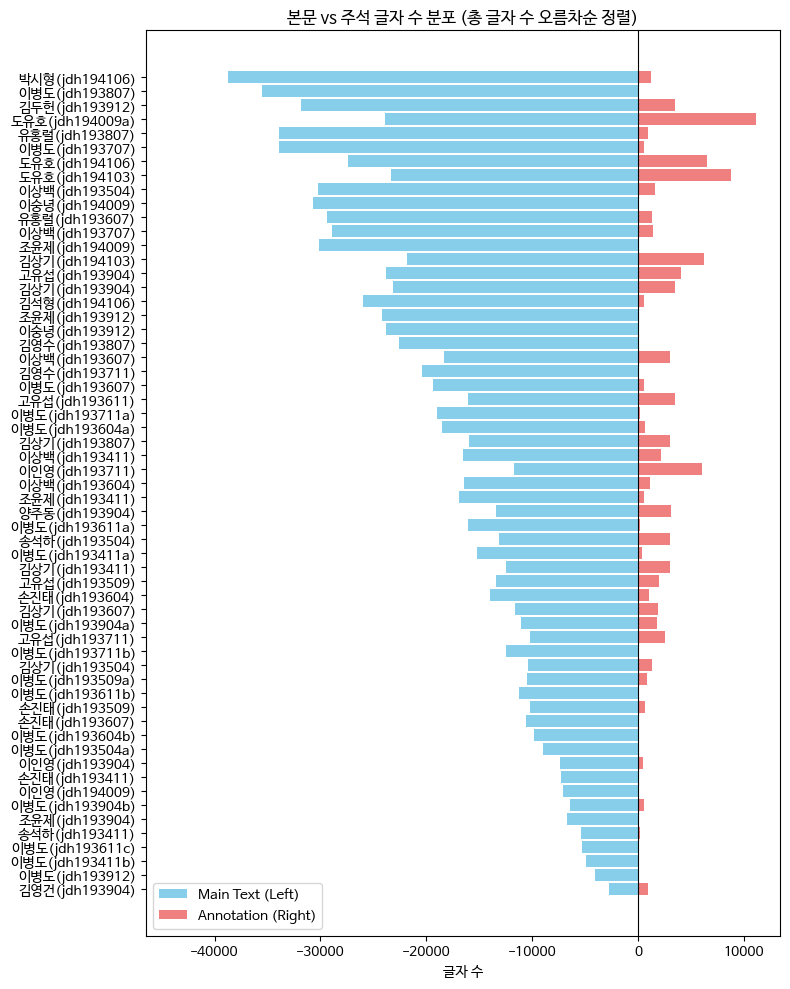

In [ ]:
# --- 데이터 준비 ---
# 'TotalChars' 열 추가: 'CharCount_x'(본문)와 'CharCount_y'(각주)의 합계로 총 글자 수 계산
# (이전 코드에서 combined_char_count DataFrame이 준비되었다고 가정)
combined_char_count["TotalChars"] = (
    combined_char_count["CharCount_x"] + combined_char_count["CharCount_y"]
)

# 'TotalChars' 기준으로 정렬 (오름차순: 작은 값이 위로)
sorted_data = combined_char_count.sort_values(by="TotalChars", ascending=False)[::-1]

# 그래프에 사용할 데이터 추출
sections = sorted_data["TermId"]              # y축 항목 (예: 논문 ID)
main_text = sorted_data["CharCount_x"] * -1   # 본문 글자 수 (음수로 변환하여 그래프 왼쪽에 표시)
footnotes = sorted_data["CharCount_y"]        # 주석 글자 수 (양수로 그래프 오른쪽에 표시)

# --- 그래프 생성 ---
plt.figure(figsize=(8, 10)) # 그래프 크기 설정

# 1. 본문 데이터 가로 막대그래프 (왼쪽)
plt.barh(sections, main_text, color='skyblue', label='Main Text (Left)') # '본문 (왼쪽)'

# 2. 각주 데이터 가로 막대그래프 (오른쪽)
plt.barh(sections, footnotes, color='lightcoral', label='Annotation (Right)') # '각주 (오른쪽)'

# --- 그래프 꾸미기 ---
plt.axvline(0, color='black', linewidth=0.8) # 중앙선(x=0) 추가

# x축 레이블 설정 (한글로 변경 가능)
plt.xlabel('글자 수') # 'Character Count' -> '글자 수'
# 그래프 제목 설정 (한글로 변경 가능)
plt.title('본문 vs 주석 글자 수 분포 (총 글자 수 오름차순 정렬)') # 'Distribution of Main Text vs Footnotes (Sorted by Total Length)'

plt.xlim(-main_text.abs().max() * 1.2, footnotes.max() * 1.2) # x축 범위 설정
plt.legend(loc='lower left') # 범례 표시 (위치: 왼쪽 아래)

# --- 그래프 출력 ---
plt.tight_layout() # 레이아웃 자동 조정
plt.show() # 그래프를 화면에 표시

# The End of Note